<b>The 7.8 Magnitude Gorkha Earthquake on April 25, 2015 in Nepal</b>
<img src=https://upload.wikimedia.org/wikipedia/commons/d/d0/April_2015_Nepal_earthquake_ShakeMap_version_6.png>

<b>Setting Up Libraries and Client</b>

In this section, we will import the essential libraries and initialize the client required for retrieving and processing earthquake data.

<b>Explanation</b>

1. **Importing Libraries**:
   - `import matplotlib.pyplot as plt`: This imports the `pyplot` module from Matplotlib, which is used for creating various types of plots and visualizations.
   - `import matplotlib.dates as mdates`: This imports the `dates` module from Matplotlib, which provides functions for handling and formatting dates in plots.
   - `from obspy import UTCDateTime`: This imports the `UTCDateTime` class from ObsPy, which is used for handling and formatting dates and times in earthquake data.
   - `from obspy.clients.fdsn import Client`: This imports the `Client` class from ObsPy's FDSN (Federated Data Services Network) module, which is used for querying earthquake catalogs.

2. **Initializing the Client**:
   - `client = Client("IRIS")`: This creates an instance of the `Client` class with the "IRIS" network, which allows us to access earthquake catalog data from the IRIS (Incorporated Research Institutions for Seismology) data repository.

By importing these libraries and initializing the client, we set up the necessary tools for accessing earthquake data and preparing it for analysis and visualization.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("IRIS")

<b>Setting Search Parameters</b>

In this section, we define the parameters for our earthquake catalog search. These parameters include the date range, geographical location, search radius, and minimum magnitude for the events we want to retrieve.

<b> Explanation</b>

1. **Date Range**:
   - `startt = UTCDateTime("2005-04-25")`: This sets the start date for the search to April 6, 2005, using the `UTCDateTime` format from ObsPy. This is 10 years before the 2015 Nepal earthquake.
   - `endt = UTCDateTime("2015-04-25")`: This sets the end date for the search to April 25, 2015, the day of the mainshock.

2. **Geographical Location**:
   - `lon = 84.7314`: This sets the longitude of the search's central location, specifically for the 2015 Nepal earthquake epicenter.
   - `lat = 28.2312`: This sets the latitude of the search's central location.

3. **Search Radius**:
   - `maxrad = 2.0`: This sets the maximum radius of the search area to 2.0 degrees. The search will include events within a 2-degree radius from the specified latitude and longitude.

4. **Minimum Magnitude**:
   - `minmag = 4.0`: This sets the minimum magnitude for the earthquakes to be included in the search. Only events with a magnitude of 4.0 or greater will be retrieved.

By setting these parameters, we define the specific criteria for the earthquake data we want to analyze, focusing on the region around the 2015 Nepal earthquake epicenter over a 10-year period leading up to the mainshock.


In [3]:
startt = UTCDateTime("2005-04-25")
endt = UTCDateTime("2015-04-25") 
lon = 84.7314
lat = 28.2312
maxrad = 2.0 
minmag = 4.0

<b>Retrieving the Earthquake Catalog</b>

In this section, we use the `client.get_events()` function from the ObsPy library to retrieve an earthquake catalog based on the search parameters we previously set. The catalog will include events within the specified date range, geographical location, and magnitude criteria.

<b>Explanation</b>

**Function:** `client.get_events()`

This function queries the specified earthquake data provider (in this case, IRIS) and retrieves a catalog of events that match the criteria provided.

**Parameters:**

- `starttime=startt`: The start time for the search (April 25, 2005).
- `endtime=endt`: The end time for the search (April 25, 2015).
- `latitude=lat`: The latitude of the search's central location (28.2312).
- `longitude=lon`: The longitude of the search's central location (84.7314).
- `maxradius=maxrad`: The maximum radius of the search area, in degrees (2.0).
- `minmagnitude=minmag`: The minimum magnitude of events to be included in the catalog (4.0).
- `catalog="ISC"`: Specifies that the catalog from the International Seismological Centre (ISC) will be used for this search.

This command gathers a comprehensive list of seismic events that occurred within the specified area and timeframe, focusing on the region around the specified coordinates. The resulting catalog object (`cat`) will contain the earthquake data, which we can analyze and visualize in the subsequent steps.


In [4]:
cat = client.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag, catalog="ISC")

In [5]:
print(cat)

43 Event(s) in Catalog:
2015-04-02T00:56:41.240000Z | +28.756,  +86.388 | 4.6  mb
2015-01-31T13:59:42.140000Z | +28.287,  +84.015 | 4.8  mb
...
2005-10-31T21:47:54.460000Z | +28.496,  +84.901 | 4.7  MW
2005-10-14T07:23:28.680000Z | +27.960,  +86.618 | 4.0  mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'


<b>Creating Lists for Earthquake Times and Magnitudes</b>

In this section, we will process the earthquake catalog data to extract and organize the information into two separate lists: `times` and `mags`.

<b>Explanation</b>>

1. **Initialization of Lists**: 
   - We start by creating two empty lists, `times` and `mags`, using the syntax `[]`. These lists will be used to store the origin times and magnitudes of each earthquake event, respectively.

2. **Loop Through Events**:
   - We will loop through each earthquake event in the catalog (`cat`) obtained from `client.get_events()`. During this loop, we will extract specific details from each event.

3. **Extracting Data**:
   - For each event, the origin time is accessed using `event.origins[0].time.datetime`, and the magnitude is accessed using `event.magnitudes[0].mag`.
   - `event.origins[0].time.datetime` retrieves the time of the earthquake event, while `event.magnitudes[0].mag` retrieves the magnitude.

4. **Appending Data to Lists**:
   - The `times.append()` method is used to add each extracted origin time to the `times` list.
   - Similarly, the `mags.append()` method is used to add each extracted magnitude to the `mags` list.

5. **Purpose of Lists**:
   - By organizing the data into these lists, we make it easier to modify and plot the times and magnitudes using Matplotlib in the subsequent steps.

This structured approach allows us to efficiently handle and visualize earthquake data, making it easier to identify patterns and trends.

In [6]:
times = []
mags = []
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)
print (times[4],mags[4])

2014-08-03 05:57:30.560000 5.2


<b>Converting Times to Matplotlib Format</b>

In this step, we'll convert the `times` list, which contains datetime objects, into a format that matplotlib can use for plotting on the x-axis. This is achieved using the `mdates.date2num()` function from the `matplotlib.dates` module. The following code will create a new list called `mtimes` that contains these converted times:



In [7]:
mtimes = mdates.date2num(times)
print(mtimes)

[16527.0393662  16466.58312662 16422.64737211 16399.65909248
 16285.24827037 16285.24819444 16285.24053264 16234.67807338
 15980.9781066  15947.75173484 15947.74217002 15882.93207593
 15649.54721875 15576.16379421 15576.01197222 15575.68774433
 15563.65603194 15561.55005567 15553.82644248 15500.32928646
 15290.9909147  15201.70005868 15118.53610243 15059.34933819
 15045.00472454 14938.58718021 14900.18533426 14899.84120451
 14668.91907245 14666.19627419 14555.83945775 14547.18691354
 14360.54570139 14299.64134618 14141.82428356 14050.75413391
 13822.73085868 13815.4092684  13242.34938113 13182.08180741
 13142.755614   13087.90826921 13070.30797083]


<b>Plotting Earthquake Magnitudes Over Time</b>
The following code will create a plot that displays the magnitude of each earthquake in the catalog over time. We start by initiating the plot with the plt.subplots(1, 1) command, which sets up a single plot (subplot) on the figure. The plt.plot_date() function is then used to plot the magnitudes (mags) on the y-axis against the corresponding times (mtimes) on the x-axis, with each earthquake represented as a point (specified by the marker='.'). Finally, the plt.show() command is called to render and display the plot.

/tmp/ipykernel_656/3485142674.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(mtimes, mags,marker= '.')


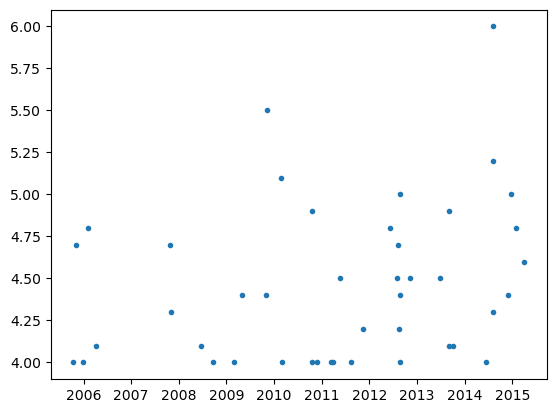

In [9]:
fig1, ax1 = plt.subplots(1, 1)
plt.plot_date(mtimes, mags,marker= '.')
plt.show()

<b>Histogram of Seismicity Rates Leading Up to the 2015 Earthquake</b>

In this section, we will analyze the seismicity rates leading up to the 2009 earthquake by creating a histogram. The code below accomplishes the following:

1. **Initialization**: We define the plot with `fig2, axes = plt.subplots(1, 1)`, which creates a figure and a set of axes for the plot.

2. **Histogram Plotting**: We use `axes.hist(mtimes, bins=120)` to plot the histogram of seismicity rates. The `bins=120` parameter provides a fine resolution, allowing us to see the distribution of seismic events over time with greater detail.

3. **X-Axis Formatting**: To make the plot more informative, we format the X-axis to display years:
   - `axes.xaxis.set_major_locator(mdates.YearLocator())` sets the major ticks on the X-axis to appear at yearly intervals.
   - `axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))` formats the major ticks to show the year in a four-digit format.

4. **Displaying the Plot**: Finally, `plt.show()` is used to display the plot within the notebook.

This approach allows us to visualize the changes in seismicity rates over time, focusing on the period leading up to the 2015 earthquake.

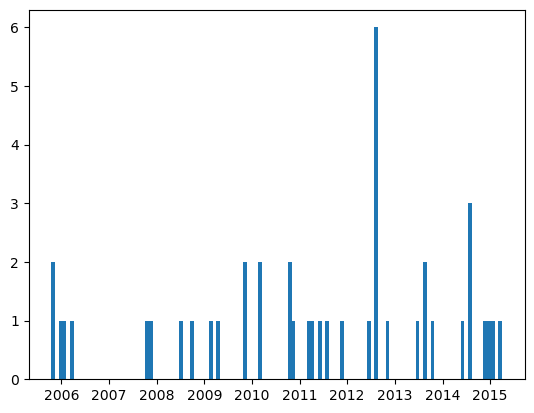

In [12]:
fig2, axes = plt.subplots(1, 1)
axes.hist(mtimes, bins=120)
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

<b>Summary of Seismicity Analysis</b>

**Increased Activity Before the 2015 Earthquake:** There was a noticeable increase in seismicity rates leading up to the 2015 Nepal earthquake, reflecting an escalation in tectonic activity in the region.

**Long-Term High Seismicity:** Two years(2012-2013) preceding the 2015 earthquake showed elevated seismicity rates compared to earlier periods, suggesting sustained tectonic stress in the area.

**Major Earthquake Event:** The 2015 Nepal earthquake, with a magnitude of 7.8, was the most significant seismic event in the region during this period. It marked the culmination of the ongoing tectonic stress and resulted in widespread impact.

This summary underscores the period of elevated seismic activity that ultimately led to the 2015 Nepal earthquake, illustrating the complex dynamics of seismic events and their potential to culminate in significant earthquakes.
